In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data = open('Shakespear.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)



max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [4]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.9086 - accuracy: 0.0210
Epoch 2/100
15462/15462 [==============================] - 21s 1ms/sample - loss: 6.5049 - accuracy: 0.0215
Epoch 3/100
15462/15462 [==============================] - 22s 1ms/sample - loss: 6.4095 - accuracy: 0.0241s - los
Epoch 4/100
15462/15462 [==============================] - 22s 1ms/sample - loss: 6.2903 - accuracy: 0.0290
Epoch 5/100
15462/15462 [==============================] - 24s 2ms/sample - loss: 6.1877 - accuracy: 0.0344
Epoch 6/100
15462/15462 [==============================] - 23s 2ms/sample - loss: 6.1079 - accuracy: 0.0382
Epoch 7/100
15462/15462 [==============================] - 23s 2ms/sample - loss: 6.0285 - accuracy: 0.0383
Epoch 8/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 5.9539 - accuracy: 0.0422
Epoch 9/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 5.8668 - accuracy: 0.046

15462/15462 [==============================] - 83s 5ms/sample - loss: 2.0927 - accuracy: 0.6172 1:20 - loss: 1.8361 - accuracy:  - E - ETA: 1:00 - loss: 2.0020 - accu - ETA: 59s - l - ETA - ETA: 47s - loss: 2.0110 - accuracy:  - ETA: 46s - loss: 2.0117 - ac - ETA: 44s - loss: 2.0171 - - ETA: 41s - loss: 2.0349 - accuracy: - ETA: 40s - loss: 2.0406 - accuracy: 0.633 - ETA: 39s - loss: 2.0421 - accuracy: 0. - ETA: 39s - loss: 2.0470 - accurac - ETA: 37s - loss: 2.0495 - accuracy - ETA: 36s - loss: 2.0532 - accuracy: 0. - ETA: 35s - loss: 2.0518 - accuracy:  - ETA: 34s - loss: 2.0551  - ETA: 31s - loss: 2.0562 - accuracy: 0.629 - ETA: 31s - loss: 2.0534 - accuracy: 0.630 - ETA: 31s - loss: 2.0544 - accuracy: 0 - ETA: 30s - loss: 2.0525 - accurac - ETA: 28s - loss: 2.0514 - accuracy: 0. - ETA: 28s - ETA: 22s - loss: 2.0593 - accuracy: 0.627 - ETA: 22s - - ETA: 16s - loss: 2.0706 - ac - ETA: 14s - loss: 2.0674 - accuracy: 0. - ETA: 13s - loss: 2.0703 - accuracy: 0.624 - ETA: 13s - loss: 2.0

15462/15462 [==============================] - 91s 6ms/sample - loss: 1.8875 - accuracy: 0.6630 1:19 - loss: 1.8149 - ac - - ETA: 1:18 - - ETA: 1:12 - loss: 1.7620 -  - ETA: 1:10 - loss: 1.7630 - accuracy:  - ETA: 1:10 - loss: - ETA: 1:07 - loss: 1.777 - ETA - E - ETA: 57s - loss: 1.8078 - accuracy: - ETA: 55s - los - ETA: 50s  - ETA: 44s - loss: 1.8159 - accuracy: 0 - ETA: 43s - loss: 1.8165 - accur - ETA: 41s - loss: 1.8236 - ac - ETA: 39s - loss: 1.8292 - accuracy: 0 - ETA: 38s - lo - ETA: 32s - loss: 1.8400 - accuracy: 0.6 - ETA: 32s - loss: - ETA: 27s - loss: 1.8484 - acc - ETA: 24s - loss: 1.8549 - accuracy: 0.6 - ETA: 24s - loss: 1.8550 -  - ETA: 21s - loss: 1. - ETA: 17s - loss: 1.8628 - accuracy: 0. - ETA: 16s - loss: 1.8638 - accuracy:  - ETA: 15s - loss: 1.8644 - accuracy - ETA: 13s - loss: 1.8706 - ETA: 10s - loss: 1.87
Epoch 64/100
15462/15462 [==============================] - 92s 6ms/sample - loss: 1.8461 - accuracy: 0.6718ETA: 1:08 - loss: 1 - ETA: 1:06 - loss: 1.7609 -

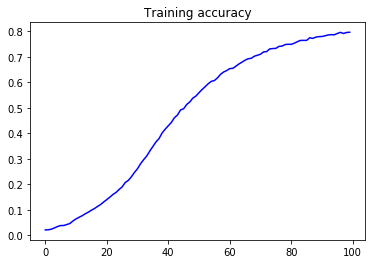

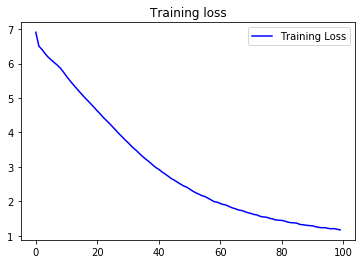

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [6]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of reason to crave junes sky prove of youth they make me bright night out two rare light quite near fix'd twain rolling rolling twain twain twain treasure men twain ' so told her tongue speaking sun exceeds warm'd hate vainly burn'd parts on thine state of thine eye more delight might gone away alone o'er grow words hence allay'd last again so days me last to thine ' so told for true poor true good thief ride one survey hence long leaves fill he grow mad back lived hast me bright bright bright prove quite near mute did stand
